# Taller de Machine Learning: Predicción de Supervivencia en el Titanic 🚢

En este taller trabajaremos con un dataset clásico de Kaggle para predecir si un pasajero del Titanic sobrevivió o no usando modelos de machine learning. El objetivo es que puedas:

1. Importar y explorar los datos
2. Preparar los datos para entrenar modelos
3. Ajustar al menos 3 modelos de clasificación
4. Evaluar su desempeño y comparar resultados
5. Escoger el mejor modelo para predecir la supervivencia

**Dataset**: [Titanic Dataset en Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

![Titanic imagen](https://raw.githubusercontent.com/Masterx-AI/Project_Titanic_Survival_Prediction_/main/titanic.jpg)

<!-- Taller preparado por Andres Muñoz (anguihero) con el fin de formar profesionales en ciencia de datos -->


## 🛳️ Descripción del Dataset: Titanic - Predicción de Supervivencia

El hundimiento del Titanic es uno de los naufragios más trágicos y célebres de la historia moderna.

📅 El 15 de abril de 1912, durante su viaje inaugural, el Titanic —considerado "insumergible"— colisionó con un iceberg. Lamentablemente, **no había suficientes botes salvavidas** para todos los pasajeros y tripulación. Como resultado, **1502 de las 2224 personas a bordo murieron**.

Aunque hubo un factor de suerte, los datos sugieren que **algunos grupos de personas tenían más probabilidades de sobrevivir** que otros.

---

### 🎯 Objetivo del Desafío

Construir un modelo predictivo que responda a la pregunta:

> **¿Qué tipo de personas tenían más probabilidades de sobrevivir al desastre?**

Usando información de los pasajeros como:
- Nombre
- Edad
- Género
- Clase socioeconómica (Pclass)
- Entre otros

---

### 🔍 Actividades Principales

- Explorar y entender el dataset.
- Limpiar y preparar los datos.
- Construir un modelo de clasificación robusto para predecir la variable `Survived`.
- Ajustar hiperparámetros y comparar distintos algoritmos.

---

### 📌 Fuente del Dataset

Este conjunto de datos ha sido referenciado desde Kaggle:  
🔗 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

---


## 0. Preparar el Entorno de Trabajo 🛠️

Antes de comenzar, debemos asegurarnos de que el entorno de trabajo esté correctamente configurado. Esto incluye:

- Importar las librerías necesarias para análisis de datos, visualización y machine learning.
- Configurar el entorno para visualizar gráficos de manera adecuada.
- Silenciar advertencias para evitar ruido innecesario en la ejecución del notebook.

📌 **Hint**: Si alguna librería no está instalada, puedes instalarla con `!pip install nombre-libreria`.


In [1]:
# TODO

# manejo de datos / tablas y/o matrices
import numpy as np
import pandas as pd

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns


# modelos analiticos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## 1. Cargar el dataset

📌 **Hint**: Descarga el archivo desde Kaggle y colócalo en tu carpeta de trabajo con el nombre `Titanic-Dataset.csv`.

**Nombre del archivo esperado:** `Titanic-Dataset.csv`

Vamos a leerlo usando pandas:


In [3]:
# TODO

# cargar en el espacio de trabajo el archivo...

# Leer el dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explorar los datos

Vamos a entender la estructura del dataset:
- ¿Cuántos registros y columnas tiene?
- ¿Qué tipo de variables hay?
- ¿Existen valores nulos?
- ¿Cómo es la distribución de la variable objetivo `Survived`?

📌 **Hint**: Usa `.info()`, `.describe()`, `.isnull().sum()`, y gráficos de `seaborn`.


In [4]:
# TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
list_columns = ['Name','Sex','Ticket','Cabin','Embarked']
df[list_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


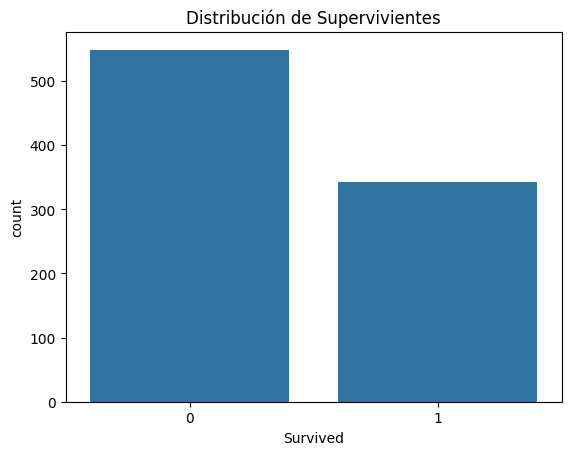

In [10]:

# Distribución de la variable objetivo
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivientes')
plt.show()


## 3. Preparar datos para el modelo

Vamos a:
- Seleccionar algunas variables predictoras
- Codificar las variables categóricas
- Imputar valores nulos
- Dividir el dataset en train y test

📌 **Hint**: Prueba con las variables `Pclass`, `Sex`, `Age`, `Fare`.


In [14]:
# TODO

# seleccionar variables
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features].copy()
print(X.head())
print('-----------------')
y = df['Survived']
print(y.head())


   Pclass     Sex   Age     Fare
0       3    male  22.0   7.2500
1       1  female  38.0  71.2833
2       3  female  26.0   7.9250
3       1  female  35.0  53.1000
4       3    male  35.0   8.0500
-----------------
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [15]:

# 1er paso :
# dividir dataset de train y test
#
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=20250407)

In [16]:



# 2do paso :
# imputar valores ausentes : pipeline
# codificar categoricas : pipeline

# crear listas por formato
list_numericas = ['Age','Fare']
list_categoricas = ['Pclass','Sex']

# pipelines por formato
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median', add_indicator=True))
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# preprocesador
preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, list_numericas),
        ('cat', categorical_pipeline, list_categoricas)
    ])

In [17]:
# solo ajusto con entrenamiento
# luego de ajustar se transforma
X_train_trans = preprocessor.fit_transform(X_train)
# prueba solo se transforma
X_test_trans = preprocessor.transform(X_test)


In [18]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median'))]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex'])])

In [20]:
X_train_trans

array([[29.    ,  7.8958,  1.    , ...,  1.    ,  0.    ,  1.    ],
       [24.    ,  7.4958,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [30.    , 27.75  ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [19.    ,  7.8792,  0.    , ...,  1.    ,  1.    ,  0.    ],
       [17.    , 12.    ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       [44.    , 26.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])

## 4. Ajustar modelos

Vamos a entrenar **tres** modelos diferentes, por ejemplo:
1. Regresión Logística
2. Random Forest
3. Máquina de Vectores de Soporte (SVM)
4. KNN
5. XGBoost
6. LightGBM

📌 **Hint**: Usa `.fit()` y `.predict()` para cada modelo.


### Decision Tree

In [21]:
# TODO

from sklearn.tree import DecisionTreeClassifier

# 3. Árbol de Decisión
tree_model = DecisionTreeClassifier(
    max_depth=3, # profundidad máxima del árbol, mayor profundidad puede capturar relaciones más complejas pero también puede llevar al sobreajuste
    min_samples_split=2, # Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Si el número de muestras en un nodo es menor que min_samples_split el nodo no se dividirá y se considerará una hoja
    min_samples_leaf=1 # Especifica el número mínimo de muestras requeridas para ser una hoja. Si la división de un nodo resulta en una hoja con un número de muestras menor que min_samples_leaf esa división no se realizará
    )

# ajuste a los datos
tree_model.fit(X_train_trans, y_train)
# predicciones
y_pred = tree_model.predict(X_test_trans)


# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test_trans)[:,1], multi_class='ovr')

print("\nMétricas de Evaluación DT:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación DT:
Accuracy: 0.7864406779661017
Precision: 0.786195626097863
Recall: 0.7864406779661017
F1 Score: 0.7407407407407407
ROC AUC Score: 0.8466549796266464


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
forest_model = RandomForestClassifier(
    n_estimators=100, # Especifica el número de árboles en el bosque.
    max_depth=5, # profundidad máxima de cada árbol en el bosque.
    min_samples_split=2,  # número mínimo de muestras requeridas para dividir un nodo interno en cada árbol
    min_samples_leaf=1 # número mínimo de muestras requeridas para ser una hoja en cada árbol
)

# ajustar
forest_model.fit(X_train_trans, y_train)
# prediccion
y_pred = forest_model.predict(X_test_trans)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, forest_model.predict_proba(X_test_trans)[:,1], multi_class='ovr')

print("\nMétricas de Evaluación RF:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación RF:
Accuracy: 0.8
Precision: 0.7991356957649094
Recall: 0.8
F1 Score: 0.7531380753138075
ROC AUC Score: 0.870558135127452


K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# 6. K Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(
    # Especifica el número k de vecinos que se utilizarán para hacer predicciones
    n_neighbors=5, # Un valor más alto de n_neighbors resultará en predicciones más suaves y menos sensibles al ruido, pero también puede reducir la capacidad del modelo para capturar patrones complejos en los datos
    #  Determina cómo se ponderan las contribuciones de los vecinos
    weights='distance',  # Puede ser "uniforme", donde todos los vecinos tienen el mismo peso en la predicción, o "distance", donde el peso de cada vecino es inversamente proporcional a su distancia desde el punto de consulta
    # Especifica el algoritmo utilizado para calcular los vecinos más cercanos.
    algorithm='auto' # Puede ser "auto", "ball_tree", "kd_tree" o "brute"
)
# ajustar
knn_model.fit(X_train_trans, y_train)
# prediccion
y_pred = knn_model.predict(X_test_trans)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_trans)[:,1], multi_class='ovr')

print("\nMétricas de Evaluación KNN:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación KNN:
Accuracy: 0.6745762711864407
Precision: 0.6696928213631989
Recall: 0.6745762711864407
F1 Score: 0.5714285714285714
ROC AUC Score: 0.7227565621150382


# support vector Machine

In [24]:
from sklearn.svm import SVC

# 5. Support Vector Machine (SVM)
svm_model = SVC(
    # El kernel determina cómo se mapean los datos de entrada en un espacio de mayor dimensión donde sea más fácil realizar la separación
    kernel='rbf', # Los kernels comunes son "linear" (lineal), "poly" (polinómico), "rbf" (función de base radial) y "sigmoid" (sigmoidal)
    # Parámetro de regularización que controla la penalización por errores de entrenamiento
    C=1.0, # Un valor más bajo de C permitirá un margen más amplio y permitirá que se clasifiquen más puntos correctamente, pero puede llevar al sobreajuste
    # Coeficiente de kernel para los kernels "rbf", "poly" y "sigmoid"
    gamma = 'scale' # lor más alto de gamma significa que los puntos de datos más cercanos tienen más peso en la predicción, lo que puede conducir a un modelo más ajustado a los datos de entrenamiento.
)
# ajustar
svm_model.fit(X_train_trans, y_train)
# predecir
y_pred = svm_model.predict(X_test_trans)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, svm_model.predict(X_test_trans), multi_class='ovr')

print("\nMétricas de Evaluación SVM:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación SVM:
Accuracy: 0.6305084745762712
Precision: 0.6282654142671005
Recall: 0.6305084745762712
F1 Score: 0.37714285714285717
ROC AUC Score: 0.5774424334312518


## 5. Evaluar desempeño de los modelos

Vamos a usar:
- Accuracy
- Matriz de confusión
- Reporte de clasificación

📌 **Hint**: Usa `accuracy_score`, `confusion_matrix`, `classification_report`


In [ ]:
# TODO

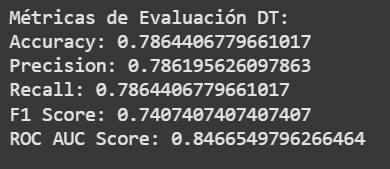

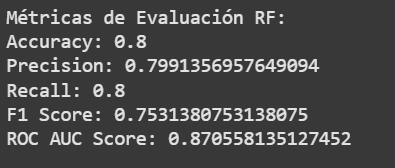

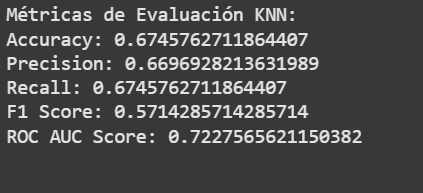

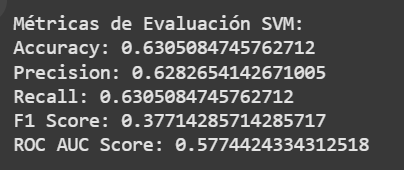

## 6. Seleccionar el mejor modelo

Basado en los resultados de evaluación, elige el modelo con mejor desempeño.

📌 **Hint**: Puedes guiarte por la métrica de *Accuracy*, pero también revisa *Precision* y *Recall* para cada clase.


In [ ]:
# TODO

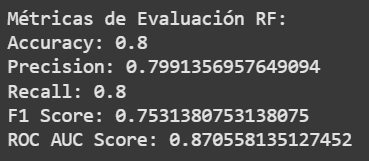

---
---
<div style="text-align:center; font-size:12px; color:#4a6c8a; font-style:italic; margin-top:20px;">
🙏 Gracias por participar y compartir esta ruta de aprendizaje. ¡Con cada aporte, hacemos que la ciencia de datos avance como comunidad!
</div>

<div style="text-align:right; font-size:10px; color:#a0b4d4; font-style:italic; margin-top:30px;">
🔹 Taller preparado por Andres Muñoz (anguihero) con el propósito de formar profesionales en ciencia de datos.
</div>

---

---